In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import model_from_json

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
(train_x,train_y),(test_x,test_y)=tf.keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
%matplotlib inline
image_num=777
print(train_y[image_num])

8


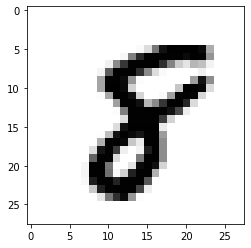

In [4]:
plt.imshow(train_x[image_num],cmap='Greys')

In [5]:
train_x[image_num].shape

(28, 28)

In [6]:
train_x.shape

(60000, 28, 28)

In [7]:
train_x_reshape=train_x.reshape(train_x.shape[0],28,28,1)
test_x_reshape=test_x.reshape(test_x.shape[0],28,28,1)

In [8]:
train_x_reshape.shape,test_x_reshape.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [9]:
input_size=(28,28,1)
train_x_reshape=train_x_reshape.astype('float32')
test_x_reshape=test_x_reshape.astype('float32')

In [10]:
train_x_reshape/=255.0
test_x_reshape/=255.0

In [11]:
print(train_x_reshape.shape)
print(test_x_reshape.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [12]:
from tensorflow.keras.layers import Flatten,Dense,MaxPooling2D,Conv2D,Dropout
from tensorflow.keras.models import Sequential

model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=input_size))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))

In [13]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

In [15]:
earlystopping=EarlyStopping(monitor='val_loss', patience=2)

In [16]:
model.fit(x=train_x_reshape,y=train_y,validation_split=0.2,epochs=5,callbacks=[earlystopping])

Epoch 1/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.2442 - accuracy: 0.9259 - val_loss: 0.0960 - val_accuracy: 0.9728
Epoch 2/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.1001 - accuracy: 0.9689 - val_loss: 0.0825 - val_accuracy: 0.9762
Epoch 3/5
1500/1500 [==============================] - 17s 12ms/step - loss: 0.0718 - accuracy: 0.9779 - val_loss: 0.0642 - val_accuracy: 0.9818
Epoch 4/5
1500/1500 [==============================] - 18s 12ms/step - loss: 0.0552 - accuracy: 0.9825 - val_loss: 0.0594 - val_accuracy: 0.9833
Epoch 5/5
1500/1500 [==============================] - 19s 12ms/step - loss: 0.0446 - accuracy: 0.9858 - val_loss: 0.0644 - val_accuracy: 0.9826


In [17]:
model.evaluate(test_x_reshape,test_y)

313/313 [==============================] - 1s 5ms/step - loss: 0.0590 - accuracy: 0.9818


[0.05896800011396408, 0.9818000197410583]

8


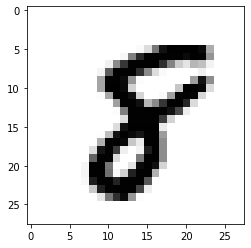

In [18]:
image_num=777
plt.imshow(train_x[image_num],cmap='Greys')
pred=model.predict(train_x[image_num].reshape(1,28,28,1))
print(pred.argmax())

### 保存model，装载model，并预测   
keras官方资料  
https://keras.io/getting_started/faq/#how-can-i-install-hdf5-or-h5py-to-save-my-models

In [19]:
model.save("model_h5")

In [20]:
!ls -l

total 8
---------- 1 root root  263 Nov 10 08:40 __notebook_source__.ipynb
drwxr-xr-x 4 root root 4096 Nov 10 08:41 model_h5


In [21]:
del model

In [22]:
from tensorflow.keras.models import load_model

In [23]:
model=load_model("model_h5")

7


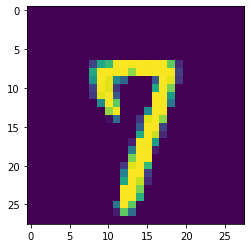

In [24]:
plt.imshow(train_x[888])
pred=model.predict(train_x[888].reshape(1,28,28,1))
print(pred.argmax())

In [26]:
json_string = model.to_json()
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "conv2d_input"}}, {"class_name": "Conv2D", "config": {"name": "conv2d", "trainable": true, "batch_input_shape": [null, 28, 28, 1], "dtype": "float32", "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "linear", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "MaxPooling2D", "config": {"name": "max_pooling2d", "trainable": true, "dtype": "float32", "pool_size": [2, 2], "padding": "valid", "strides": [2, 2], 

In [39]:
def save_model(model):
    json_string = model.to_json()
    if not os.path.isdir("model"):
        os.mkdir("model")
    file_name="model_json.json"
    file_path=os.path.join("model",file_name)
    open(file_path,"w").write(json_string)
    print('save the architecture of a model')

save_model(model)

save the architecture of a model


In [29]:
!ls model

model_json.json


### 保存训练好的参数到hdf5文件

In [36]:
model.save_weights('param.hdf5')
print('save weights')
!ls

save weights
__notebook_source__.ipynb  model  model_h5  param.hdf5


### 使用model的json架构文件和权重结果，重新构筑model

In [44]:
del model

In [45]:
file_name="model_json.json"
file_path=os.path.join("model",file_name)    
json_string = open(os.path.join(file_path)).read()
model = model_from_json(json_string)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
__________________________________________________

2


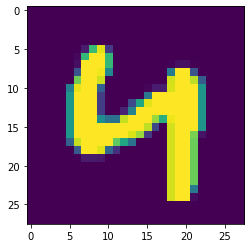

In [48]:
# 只导入了model结构但是没有导入权重参数，进行预测，结果不是很理想
plt.imshow(train_x[222])
pred=model.predict(train_x[222].reshape(1,28,28,1))
print(pred.argmax())

In [55]:
# 导入权重然后在测试，结果正确了
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
model.load_weights('param.hdf5')

4


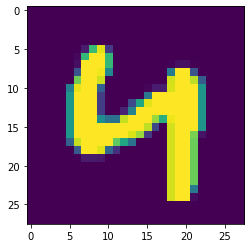

In [54]:
plt.imshow(train_x[222])
pred=model.predict(train_x[222].reshape(1,28,28,1))
print(pred.argmax())